In [1]:
import gym

# Trading Framework

This framework is developed based on Tito Ingargiola's amazing work on https://github.com/hackthemarket/gym-trading. 

In [2]:
import gym_trading
from gym_trading.envs.Q_learning import Q

C:\Users\Henry\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)



First, define the address for the CSV data


In [3]:
csv = r"GBPUSD1440.csv"

# Create a new OpenAI Gym environment with the customised Trading environment



 .initialise_simulator() must be invoked after **env.make('trading-v0')** . Within this function, provide these arguments:


* **csv**: Address of the data


* **ATR**: True/ False, (The only indicator available now)



* **trade_period**: (1 - 10), Holding period for each trades. *Default: 1*


* **train_split**: (0.0,1.0), Percentage of data set for training. *Default: 0.7*

In [4]:
env = gym.make('trading-v0')
env.initialise_simulator(csv, ATR=True, trade_period=5, train_split=0.7)

[2017-06-15 11:10:23,568] Making new env: trading-v0


Please invoke .initialise_simulator() method next to complete initialization


In this environment, there are **Simulator** and **Portfolio**. **Simulator** contains attributes related to the market *eg. Return, ATR and datetime*, whose ultimate role is to provide the environment with observation *states*. **Portfolio** contains attributes that calculates *reward*. Both components will be updated once every iterations.


Lets illustrate on *states* in Simulator. *States* is important for the agent to decide on the next action. In this implementation, there are two kinds of states; *Return* and *ATR*. *Return* is calculated by **(Close - Last_Close)/ Last_Close** and then normalised through ** X - mean(X) / std(X) **. As for *ATR*, TA-Lib's library is used to compute the function, with a period of 14, and normalised the same way.

The number of states can either be Return or both, depending on ATR setting in env.initialise_simulator(). In this example, the simulator consists of a 2-d array, first column is **Return (Normalised)** and the second column **ATR (Normalised)**

In [5]:
env.sim.states

array([[-0.1190837 ,  2.26445333],
       [ 2.68839281,  2.38706647],
       [ 2.76620553,  2.59828451],
       ..., 
       [ 0.07159915, -1.19634727],
       [-0.68985007, -1.16749171],
       [ 0.08261666, -1.22457921]])

# Next, Create Q_learning framework

This framework wraps around the trading environment.

Arguments:

* **env**: gym_trading Environment

* **train_episodes**: Number of train episodes to update Q_table

* **learning_rate**: *Default: 0.2*

* **gamma**: *Default: 0.9* 

    Upon initializing, Q_learning has zeroed Q_table **lookup_table** and **states_map**
    
 


In [6]:
Q_learning = Q(env, train_episodes=1000, learning_rate=0.2, gamma=0.9)

# States_map
**states_map** is a discretized observation space bounded by the extreme values *Return* and *ATR*, with an interval of 0.5.
For every new observation *(Return, ATR) tuple pair*, it is approximated to the closest pair on **states_map**.  **States_map** corresponds to the row index of **lookup_table**


In [7]:
Q_learning.states_map

array([[-14. ,  -2. ],
       [-14. ,  -1.5],
       [-14. ,  -1. ],
       ..., 
       [  6. ,   4. ],
       [  6. ,   4.5],
       [  6. ,   5. ]])

# Q Table
**lookup_table** has row size the length of **states_map** and column size of 3 (actions (0,1,2).).

In [8]:
Q_learning.lookup_table

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

All zero now, not trained yet

# Training

Filling up the Q Table

In [9]:
Q_learning.train()

Training period  2009-05-28 00:00:00 - 2014-12-22 00:00:00
End of Episode 1, Total reward is -1287.9
End of Episode 2, Total reward is 2111.7
End of Episode 3, Total reward is 1492.6
End of Episode 4, Total reward is 4232.0
End of Episode 5, Total reward is 3561.8
End of Episode 6, Total reward is 4661.6
End of Episode 7, Total reward is 3347.4
End of Episode 8, Total reward is 3646.3
End of Episode 9, Total reward is 2743.7
End of Episode 10, Total reward is 1729.8
End of Episode 11, Total reward is 5500.3
End of Episode 12, Total reward is 4804.0
End of Episode 13, Total reward is 2772.7
End of Episode 14, Total reward is 5957.3
End of Episode 15, Total reward is 6541.5
End of Episode 16, Total reward is 6819.8
End of Episode 17, Total reward is 7012.6
End of Episode 18, Total reward is 6917.6
End of Episode 19, Total reward is 7454.1
End of Episode 20, Total reward is 7207.1
End of Episode 21, Total reward is 7378.9
End of Episode 22, Total reward is 6988.0
End of Episode 23, Total 

After Training, Q Table is complete

In [15]:
Q_learning.lookup_table

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.0000000

# Testing

Testing the new Q Table on unseen data. 
* Q Table is not updated on Testing mode

In [19]:
Q_learning.test()


End of Test Period from 2014-12-23 00:00:00 to 2017-05-12 00:00:00, Total Reward is 61.2


SUMMARY STATISTICS
Total Trades Taken:  32
Total Reward:  61.200000000001666
Win Ratio: 50.0 %


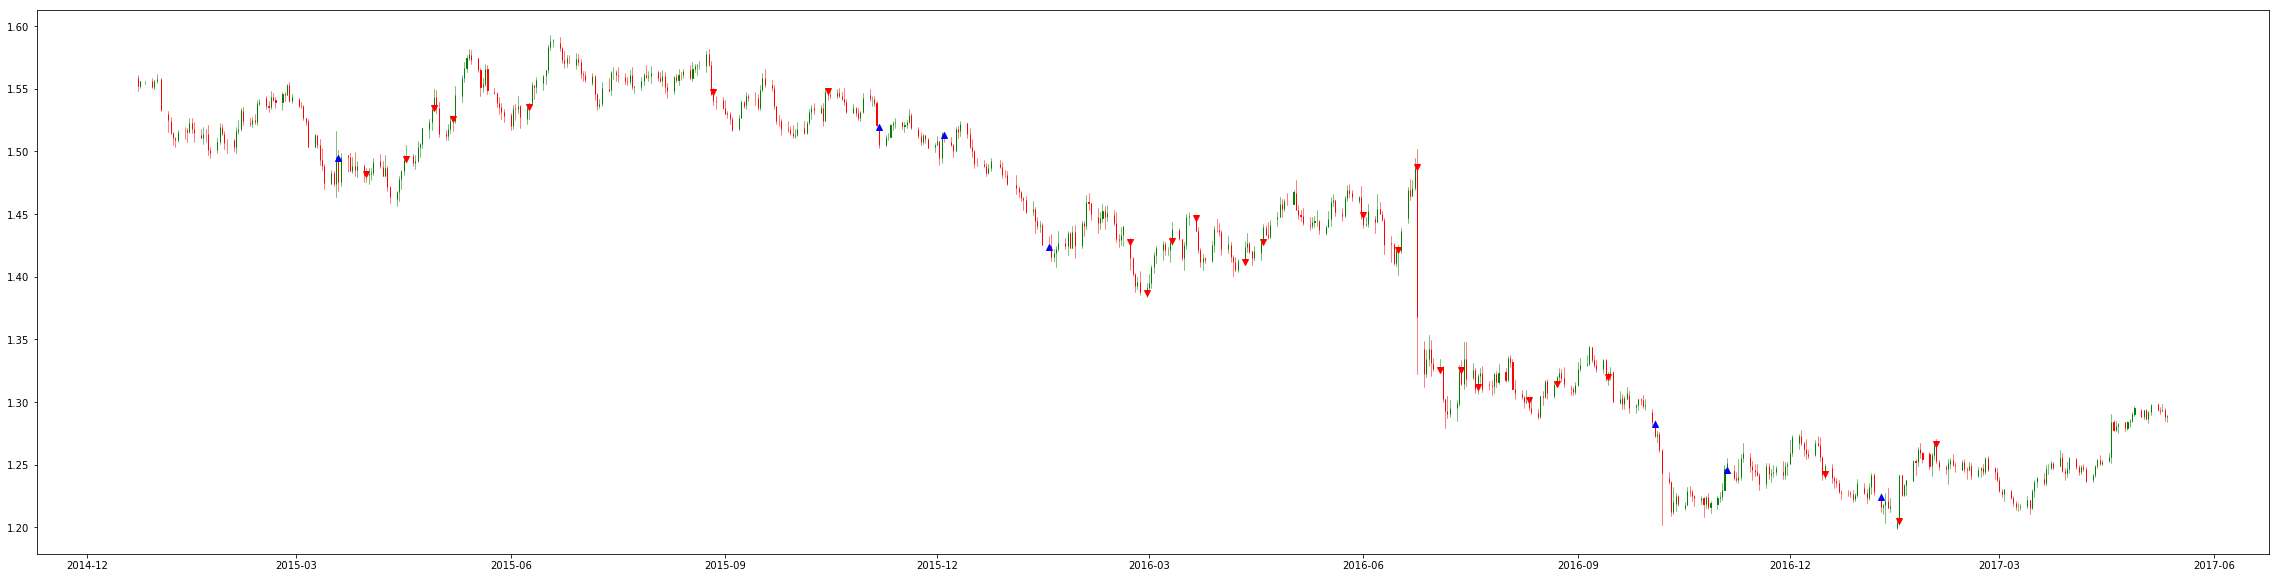

In [20]:
Q_learning._generate_summary_stats()

All trade entries are kept in env.portfolio.journal

In [21]:
env.portfolio.journal

[{'Entry Price': 1.49566,
  'Entry Time': Timestamp('2015-03-19 00:00:00'),
  'Exit Price': 1.48838,
  'Exit Time': Timestamp('2015-03-25 00:00:00'),
  'Profit': -75.799999999999528,
  'Trade Duration': 5,
  'Type': 'BUY'},
 {'Entry Price': 1.4809600000000001,
  'Entry Time': Timestamp('2015-03-31 00:00:00'),
  'Exit Price': 1.48794,
  'Exit Time': Timestamp('2015-04-06 00:00:00'),
  'Profit': -72.799999999999869,
  'Trade Duration': 5,
  'Type': 'SELL'},
 {'Entry Price': 1.49305,
  'Entry Time': Timestamp('2015-04-17 00:00:00'),
  'Exit Price': 1.5057399999999999,
  'Exit Time': Timestamp('2015-04-23 00:00:00'),
  'Profit': -129.89999999999867,
  'Trade Duration': 5,
  'Type': 'SELL'},
 {'Entry Price': 1.5338200000000002,
  'Entry Time': Timestamp('2015-04-29 00:00:00'),
  'Exit Price': 1.51799,
  'Exit Time': Timestamp('2015-05-05 00:00:00'),
  'Profit': 155.30000000000234,
  'Trade Duration': 5,
  'Type': 'SELL'},
 {'Entry Price': 1.5246,
  'Entry Time': Timestamp('2015-05-07 00:00: